## Importing libraries and data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Airbnb_data = pd.read_csv('airbnb_open_data.csv')

C:\Users\20194027\AppData\Local\Temp/ipykernel_6056/788512311.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  Airbnb_data = pd.read_csv('airbnb_open_data.csv')


## Research and clean data

All columns are checked and will be put in the same style (all lowercase, spaces instead of underscore). Further details are mentioned at each column.

In [3]:
for col in Airbnb_data.columns:
    print(col)

id
NAME
host id
host_identity_verified
host name
neighbourhood group
neighbourhood
lat
long
country
country code
instant_bookable
cancellation_policy
room type
Construction year
price
service fee
minimum nights
number of reviews
last review
reviews per month
review rate number
calculated host listings count
availability 365
house_rules
license


In [4]:
len(Airbnb_data)

102599

#### ID

Id is very important, so this column should be handled first. There should only be unique id's, since this is the key value.

In [5]:
#There are no empty cells in the id column, which is promising
Airbnb_data[Airbnb_data['id'].isna()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


In [6]:
#The length of unique id's is 541 less than the total length, so one is listed double
len(Airbnb_data['id'].unique())

102058

Above we found out that there are id's that appear more than once. Research how

In [7]:
bnb_id = Airbnb_data.groupby('id')
bnb_count = bnb_id.count()
bnb_count['NAME'].unique()


array([1, 0, 2], dtype=int64)

In [8]:
bnb_count = bnb_count[bnb_count.isin([2]).any(axis=1)]
double_id = list(bnb_count.index)

In [9]:
Airbnb_data[Airbnb_data['id'].isin(double_id)].sort_values(by = 'id')

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
9098,6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.96030,United States,...,$21,30.0,2.0,6/8/2019,0.21,3.0,34.0,157.0,NaN,NaN
102474,6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.96030,United States,...,$21,30.0,2.0,6/8/2019,0.21,3.0,34.0,157.0,NaN,NaN
102475,6026714,Close to East Side Hospitals- Modern 2 Bedroom...,31072202372,verified,Juliana,Manhattan,Upper East Side,40.76249,-73.96217,United States,...,$57,30.0,6.0,1/31/2019,0.14,3.0,34.0,67.0,"The quieter the better, but otherwise make you...",NaN
9099,6026714,Close to East Side Hospitals- Modern 2 Bedroom...,31072202372,verified,Juliana,Manhattan,Upper East Side,40.76249,-73.96217,United States,...,$57,30.0,6.0,1/31/2019,0.14,3.0,34.0,67.0,"The quieter the better, but otherwise make you...",NaN
9100,6027266,ACADIA Spacious 2 Bedroom Apt - Close to Hospi...,95854111798,verified,Juliana,Manhattan,Upper East Side,40.76021,-73.96157,United States,...,$117,30.0,10.0,11/18/2018,0.22,5.0,34.0,211.0,No Smoking No Pets,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62657,35606797,Bright and Beautiful Top Floor Two Bedrooms,65331079885,unconfirmed,Frankie,Brooklyn,Carroll Gardens,40.68383,-73.99281,United States,...,$205,30.0,18.0,11/4/2021,0.63,2.0,1.0,3.0,NaN,NaN
102240,35607349,Modern & Bright Queen Bedroom Midtown East,57770451783,unconfirmed,David,Manhattan,Upper East Side,40.76132,-73.96064,United States,...,$28,30.0,1.0,11/4/2021,0.25,3.0,4.0,307.0,NaN,NaN
62658,35607349,Modern & Bright Queen Bedroom Midtown East,57770451783,unconfirmed,David,Manhattan,Upper East Side,40.76132,-73.96064,United States,...,$28,30.0,1.0,11/4/2021,0.25,3.0,4.0,307.0,NaN,NaN
102241,35607902,Modern NEW Room|PRIVATE BATHROOM,7431680152,verified,Dariia & Jacob,Brooklyn,Bedford-Stuyvesant,40.68990,-73.94074,United States,...,$57,30.0,1.0,11/4/2021,0.25,2.0,10.0,365.0,NaN,NaN


When checking, it seems like they are the same Airbnb, so drop the duplicates.

In [10]:
Airbnb_data.drop_duplicates(inplace=True)

#### Host id

The host id is the key value to identify the owner of the Airbnb, so this is also a very important value.

In [11]:
Airbnb_data[Airbnb_data['host id'].isna()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


#### Country and country code

In [12]:
Airbnb_data['country'].unique(), Airbnb_data['country code'].unique()

(array(['United States', nan], dtype=object), array(['US', nan], dtype=object))

All Airbnb's are in New York, and all values are either the same or missing, so these columns give no information

In [13]:
Airbnb_data.drop(['country', 'country code'], axis = 1, inplace = True)

#### Name

The name is a short description of the apartment/home. If it has no value, we have no description. We will have to discuss what to do with this. I suggest replacing it with 'No description'.

In [14]:
Airbnb_data.rename(columns = {'NAME': 'name'}, inplace=True)

In [15]:
Airbnb_data['name'].fillna('No description', inplace=True)

#### host_identity_verified

Host identity verified tells us whether the owner of the Airbnb is verified, meaning that they uploaded their Passport, ID or something similar. Airbnb uses this to ensure safety and trust. For guests, verification ensures that the Airbnb is no scam.

In [16]:
Airbnb_data.rename(columns = {'host_identity_verified': 'host identity verified'}, inplace=True)

In [17]:
Airbnb_data['host identity verified'].unique()

array(['unconfirmed', 'verified', nan], dtype=object)

Either the values are verified or unconfirmed (meaning not verified in my opinion). to clear this up, we might want to change unconfirmed to not verified and nan to 'missing' or 'unknown'.

In [18]:
Airbnb_data['host identity verified'].replace('unconfirmed', 'not verified', inplace=True)
Airbnb_data['host identity verified'].fillna('unknown', inplace=True)

#### Host name

Host name is nice for in the visualization, but missing values are not very impactful. These can be changed to 'Unknown' or something similar.

In [19]:
Airbnb_data['host name'].fillna('unknown', inplace=True)

#### Neighborhood and Neighborhood group

Neighborhood and neighborhood group are nice to know, but not the most important in my opinion. for the visualization, we use longitude and latitude, and we can represen in which neighborhoods they lie with those values alone. I'll leave it for now, but won't research it further.

#### longitude and latitude

Longitude and latitude are used to place the Airbnb's on the visualization. If one of these values are missing, I won't know a way to find the correct values, so I will remove these. I also will check if there are weird values that are way out of New York.

In [20]:
Airbnb_data[Airbnb_data['long'].isna()]

,id,name,host id,host identity verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
779,1431578,"Large, furnished room in a 2 bedroom!",20368956893,not verified,Gibson,Brooklyn,Crown Heights,NaN,NaN,False,...,$108,1.0,1.0,3/18/2017,0.04,2.0,1.0,41.0,- Weekly and monthly prices are much lower - P...,NaN
785,1434892,Authentic NY Charming Artist Loft,66486085219,not verified,Bailey,Brooklyn,Greenpoint,NaN,NaN,False,...,$212,5.0,14.0,6/19/2019,0.16,5.0,1.0,226.0,We live and let live - hoping that you'd be re...,NaN
799,1442624,Huge room with private balcony,69386945815,verified,Hunt,Manhattan,East Village,NaN,NaN,False,...,$101,6.0,1.0,5/6/2013,0.01,1.0,1.0,240.0,Expect respect for the family and the space--t...,NaN
814,1450908,Decorators 5-Star Flat West Village,33280739304,verified,Watson,Manhattan,West Village,NaN,NaN,True,...,$76,20.0,157.0,8/11/2016,1.71,4.0,1.0,61.0,"Please keep it clean, thats all we really ask ...",NaN
843,1466925,Nice Private Room Beauty in Queens,15305733205,verified,Roberts,Queens,Elmhurst,NaN,NaN,True,...,$45,1.0,63.0,5/18/2019,0.89,3.0,2.0,70.0,NaN,NaN
885,1490122,Cute Room in Historic Loft!,42267829819,not verified,Jones,Brooklyn,Greenpoint,NaN,NaN,True,...,$105,14.0,22.0,5/2/2019,0.25,1.0,1.0,266.0,"Pets are cool (just clean up after them!), smo...",NaN
926,1512766,21 day Chelsea Apartment rental,10876728736,not verified,Owens,Manhattan,Flatiron District,NaN,NaN,False,...,$125,21.0,0.0,NaN,NaN,2.0,1.0,104.0,NaN,NaN
986,1545904,New York City for All Seasons!,26437872336,not verified,Douglas,Manhattan,Upper West Side,NaN,NaN,True,...,$83,1.0,25.0,6/22/2013,0.28,2.0,1.0,259.0,No Smoking No Pets,NaN


In [21]:
Airbnb_data[Airbnb_data['lat'].isna()]

,id,name,host id,host identity verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
779,1431578,"Large, furnished room in a 2 bedroom!",20368956893,not verified,Gibson,Brooklyn,Crown Heights,NaN,NaN,False,...,$108,1.0,1.0,3/18/2017,0.04,2.0,1.0,41.0,- Weekly and monthly prices are much lower - P...,NaN
785,1434892,Authentic NY Charming Artist Loft,66486085219,not verified,Bailey,Brooklyn,Greenpoint,NaN,NaN,False,...,$212,5.0,14.0,6/19/2019,0.16,5.0,1.0,226.0,We live and let live - hoping that you'd be re...,NaN
799,1442624,Huge room with private balcony,69386945815,verified,Hunt,Manhattan,East Village,NaN,NaN,False,...,$101,6.0,1.0,5/6/2013,0.01,1.0,1.0,240.0,Expect respect for the family and the space--t...,NaN
814,1450908,Decorators 5-Star Flat West Village,33280739304,verified,Watson,Manhattan,West Village,NaN,NaN,True,...,$76,20.0,157.0,8/11/2016,1.71,4.0,1.0,61.0,"Please keep it clean, thats all we really ask ...",NaN
843,1466925,Nice Private Room Beauty in Queens,15305733205,verified,Roberts,Queens,Elmhurst,NaN,NaN,True,...,$45,1.0,63.0,5/18/2019,0.89,3.0,2.0,70.0,NaN,NaN
885,1490122,Cute Room in Historic Loft!,42267829819,not verified,Jones,Brooklyn,Greenpoint,NaN,NaN,True,...,$105,14.0,22.0,5/2/2019,0.25,1.0,1.0,266.0,"Pets are cool (just clean up after them!), smo...",NaN
926,1512766,21 day Chelsea Apartment rental,10876728736,not verified,Owens,Manhattan,Flatiron District,NaN,NaN,False,...,$125,21.0,0.0,NaN,NaN,2.0,1.0,104.0,NaN,NaN
986,1545904,New York City for All Seasons!,26437872336,not verified,Douglas,Manhattan,Upper West Side,NaN,NaN,True,...,$83,1.0,25.0,6/22/2013,0.28,2.0,1.0,259.0,No Smoking No Pets,NaN


The longitude and latitude are missing for 8 Airbnb's, in all 8 cases they are missing for both. For the rest, it looks like all values are decent, but this is not fixable for us, so these will be removed.

In [22]:
Airbnb_data = Airbnb_data[Airbnb_data['long'].notna()]

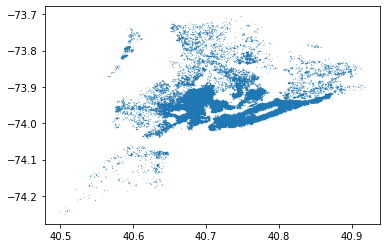

In [23]:
plt.scatter(x='lat', y='long', s=0.01, data=Airbnb_data);

There don't appear to be strange outliers in this image, so my guess is that the longitude and latitude values are correct.

#### Instant bookable

Instant bookable is a boolean, whether the room is free at this time. If this value is missing, replace it with 'Unknown'.

In [24]:
Airbnb_data.rename(columns = {'instant_bookable': 'instant bookable'}, inplace=True)

C:\Users\20194027\AppData\Local\Temp/ipykernel_6056/2903284214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbnb_data.rename(columns = {'instant_bookable': 'instant bookable'}, inplace=True)


In [25]:
Airbnb_data['instant bookable'].fillna('Unknown', inplace=True)

C:\Users\20194027\AppData\Local\Temp/ipykernel_6056/4190922403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbnb_data['instant bookable'].fillna('Unknown', inplace=True)


#### cancellation policy

Cancellation policy shows how strict the host is when the guest wants to cancel their reservation. In the dictionary, this variable isn't given, so I don't know what influences the strictness level given to the Airbnb's. For now, change nan to Unknown (again).

In [26]:
Airbnb_data.rename(columns = {'cancellation_policy': 'cancellation policy'}, inplace=True)

C:\Users\20194027\AppData\Local\Temp/ipykernel_6056/414142879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbnb_data.rename(columns = {'cancellation_policy': 'cancellation policy'}, inplace=True)


In [27]:
Airbnb_data['cancellation policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [28]:
Airbnb_data['cancellation policy'].fillna('unknown', inplace=True)

C:\Users\20194027\AppData\Local\Temp/ipykernel_6056/2600554664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbnb_data['cancellation policy'].fillna('unknown', inplace=True)


#### room type

Room type describes what kind of home the Airbnb is. All rows have a clear value, so nothing has to be done.

In [29]:
Airbnb_data['room type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

#### construction year

Construction year is not in the dict. I think the year the Airbnb was added on Airbnb, since the lowest value is 2004. filling nan will result in the values becoming 2020.0 for example, and turning into an int will not work if nan is filled, so need to look at this.

In [30]:
Airbnb_data.rename(columns = {'Construction year': 'construction year'}, inplace=True)

C:\Users\20194027\AppData\Local\Temp/ipykernel_6056/3631912237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbnb_data.rename(columns = {'Construction year': 'construction year'}, inplace=True)


In [31]:
Airbnb_data['construction year'].unique()

array([2020., 2007., 2005., 2009., 2013., 2015., 2004., 2008., 2010.,
       2019., 2018., 2006., 2016., 2017., 2021., 2003., 2011., 2012.,
       2022., 2014.,   nan])

#### Price

Another tricky one. The Airbnb's with no price are gonna give problems when filtering on price, and not showing the price when somebody hovers over an Airbnb feels wrong. Drop them? Should discuss this.

In [34]:
Airbnb_data[Airbnb_data['price'].isna()]

,id,name,host id,host identity verified,host name,neighbourhood group,neighbourhood,lat,long,instant bookable,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
147,1082524,Retreat in Williamsburg,22731046418,verified,Abraham,Brooklyn,Williamsburg,40.71492,-73.95935,True,...,$64,4.0,240.0,6/17/2019,2.19,3.0,1.0,337.0,Leave shoes by door No strong scents (perfumes...,NaN
148,1083076,NYC Zen,83696952551,verified,Amelia,NaN,East Village,40.72354,-73.98295,False,...,$119,3.0,30.0,6/17/2019,0.28,5.0,1.0,344.0,No Smoking No Pets No Parties,NaN
210,1117319,Private Garden Apt • New Renovation,760769897,unknown,Ryan,Brooklyn,Williamsburg,40.71625,-73.93845,True,...,$176,2.0,253.0,7/2/2019,3.04,3.0,1.0,124.0,Just general respect for the place and my neig...,NaN
211,1117871,Modern comfort in art infused landmark Brownstone,25801284480,unknown,Tiana,Brooklyn,Bedford-Stuyvesant,40.68290,-73.93549,True,...,$152,2.0,23.0,7/1/2019,0.22,5.0,1.0,137.0,"Enjoy your stay, and please take care of the a...",NaN
212,1118424,"NOHO/EAST VILLAGE, PRIVATE 1/2 BATH",62325020363,unknown,Perkins,Manhattan,NoHo,40.72773,-73.99134,True,...,$151,2.0,115.0,12/5/2018,1.17,2.0,1.0,192.0,SMOKING: Not allowed anywhere on the property!...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102046,57361342,Sunny budget friendly room in Bushwick,29964876857,verified,unknown,Brooklyn,Bushwick,40.69370,-73.91006,True,...,NaN,5.0,3.0,4/9/2018,0.11,1.0,1.0,0.0,Please be mindful that I live in the same buil...,NaN
102047,57361894,"Cozy Apartment on Bedford Ave, Brooklyn",92852058426,not verified,unknown,Brooklyn,Williamsburg,40.71284,-73.96284,False,...,NaN,7.0,15.0,1/1/2018,0.55,4.0,1.0,0.0,NaN,NaN
102048,57362446,Your 1 bedroom home away from home!,95572379802,verified,unknown,Manhattan,Upper West Side,40.79563,-73.97634,True,...,NaN,3.0,38.0,6/10/2019,1.40,3.0,1.0,31.0,NaN,NaN
102049,57362999,MASTER Cozy Bedroom Queen size 2 blocks Timesq...,80154173698,verified,unknown,Manhattan,Hell's Kitchen,40.76125,-73.98945,True,...,NaN,1.0,81.0,3/5/2019,2.96,2.0,2.0,0.0,- I work at home and prefer to rent to folks w...,NaN


In [49]:
Airbnb_data['price'] = Airbnb_data['price'].str.replace('$', '')


C:\Users\20194027\AppData\Local\Temp/ipykernel_6056/815015863.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Airbnb_data['price'] = Airbnb_data['price'].str.replace('$', '')
C:\Users\20194027\AppData\Local\Temp/ipykernel_6056/815015863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbnb_data['price'] = Airbnb_data['price'].str.replace('$', '')


In [55]:
pd.to_numeric(Airbnb_data['price'], errors='coerce')

0         966.0
1         142.0
2         620.0
3         368.0
4         204.0
          ...  
102053    696.0
102054    909.0
102055    387.0
102056    848.0
102057      NaN
Name: price, Length: 102050, dtype: float64

#### service fee

Service fee is a fee on top of the price, no explanation in dict. same things as for price.

In [60]:
Airbnb_data['service fee'] = Airbnb_data['service fee'].str.replace('$', '')
pd.to_numeric(Airbnb_data['service fee'], errors='coerce')

C:\Users\20194027\AppData\Local\Temp/ipykernel_6056/3940617351.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Airbnb_data['service fee'] = Airbnb_data['service fee'].str.replace('$', '')
C:\Users\20194027\AppData\Local\Temp/ipykernel_6056/3940617351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbnb_data['service fee'] = Airbnb_data['service fee'].str.replace('$', '')


0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102053      NaN
102054      NaN
102055      NaN
102056      NaN
102057      NaN
Name: service fee, Length: 102050, dtype: float64

#### minimum nights

The minimum amount of noghts you need to book. NaN is not the biggest deal, but should be fixed. change to unknown again?

In [63]:
Airbnb_data[Airbnb_data['minimum nights'].isna()]

,id,name,host id,host identity verified,host name,neighbourhood group,neighbourhood,lat,long,instant bookable,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
46,1026742,Entire apartment in central Brooklyn neighborh...,41615406010,unknown,David,Brooklyn,Prospect-Lefferts Gardens,40.65944,-73.96238,False,...,87,NaN,11.0,6/5/2019,0.49,NaN,1.0,353.0,NaN,NaN
47,1027294,"1 Stop fr. Manhattan! Private Suite,Landmark B...",81253735818,not verified,Victoria,Queens,Long Island City,40.74771,-73.94740,True,...,183,NaN,248.0,7/1/2019,2.25,NaN,1.0,26.0,"The room is strictly non-smoking, however, you...",NaN
48,1027846,Charming Brownstone 3 - Near PRATT,42134614458,verified,Jared,Brooklyn,Bedford-Stuyvesant,40.68111,-73.95591,True,...,92,NaN,61.0,5/25/2019,0.52,NaN,1.0,32.0,"No smoking, please. No drugs or guns allowed. ...",NaN
49,1028399,bright and stylish duplex,53466382920,verified,Chloe,Brooklyn,Bedford-Stuyvesant,40.68554,-73.94090,False,...,73,NaN,11.0,1/1/2017,0.10,1.0,1.0,85.0,No smoking. No pet. No shoes in the house. Vis...,NaN
50,1028951,Fort Greene brownstone,49393946881,not verified,Abraham,Brooklyn,Fort Greene,40.69142,-73.97376,True,...,42,NaN,135.0,6/17/2019,1.16,1.0,2.0,NaN,"We limit number of guests not staying, so plea...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98319,55302920,Beautiful apartment in Greenpoint,17529544376,verified,Emilie,Brooklyn,Greenpoint,40.72113,-73.95279,False,...,94,NaN,1.0,8/29/2018,0.10,4.0,1.0,0.0,Please respect all personal property/possessio...,NaN
98320,55303472,Cozy room in a three-bedroom House,38098289591,verified,Arthur,Queens,Woodhaven,40.69139,-73.86086,True,...,204,NaN,4.0,10/8/2018,0.41,4.0,2.0,180.0,We expect guests to be mindful of the neighbor...,NaN
98321,55304024,Cozy Studio Near ESB,96734324844,not verified,Studioplus,Manhattan,Midtown,40.74769,-73.98850,False,...,58,NaN,13.0,6/18/2019,1.38,3.0,13.0,358.0,NaN,NaN
98322,55304577,"SUNNY PRIVATE BEDROOM IN WILLIAMSBURG, BROOKLYN!",86773878637,not verified,Tony,Brooklyn,Williamsburg,40.71216,-73.95968,True,...,108,NaN,3.0,5/28/2019,0.30,2.0,1.0,29.0,I expect guests to treat my home as if it were...,NaN


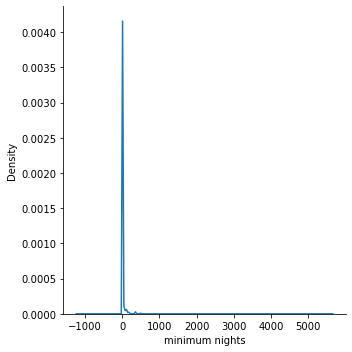

In [68]:
sns.displot(data = Airbnb_data, x = 'minimum nights', kind = 'kde')

In [73]:
Airbnb_data['minimum nights'].max()

5645.0

this can't be correct, so for now drop every value above 365 (maybe change to nan, discuss)

In [89]:
Airbnb_data = Airbnb_data[Airbnb_data['minimum nights'] <= 365]

#### Nr of reviews

First research more review info, if everything from reviews is missing from the same rows, it can all be changed to 'no reviews'. Otherwise it will become tricky.

In [92]:
rev1 = Airbnb_data[Airbnb_data['number of reviews'].isna()]
len(rev1)

181

In [93]:
rev2 = Airbnb_data[(Airbnb_data['number of reviews'].isna()) & (Airbnb_data['last review'].isna())]
len(rev2)

123

the cells above show that there are some cells where we don't know the amount of reviews, but there is at least one review

In [94]:
rev3 = Airbnb_data[(Airbnb_data['number of reviews'].isna()) & (Airbnb_data['reviews per month'].isna())]
len(rev3)

123

In [95]:
rev4 = Airbnb_data[(Airbnb_data['number of reviews'].isna()) & (Airbnb_data['reviews per month'].isna()) & (Airbnb_data['last review'].isna())]
len(rev4)

123

This shows that the rows where last review has a value, also has a value for the reviews per month. We can make an estimation for the amount of reviews with the construction year, but this will be an estimation (and i can't be bothered at the moment)

We should discuss what exactly we want to do with these columns, so I won't change them any further for now.

The other columns aren't too interesting in my opinion, so NaN values can just be turned to unknown or whatever. Problem for later.